# Lecture 17

## Simulating a Coin Toss

We aim to generate a random string of $n$ symbols ($H$ or $T$). We can start with $P(H) = P(T) = 1/2$. We also need to verify that this is a random string. We can also try $P(H) = 1/3# and $P(T) = 2/3$ if we want. 

Algorithm Used:

1. Call our RNG: $0 \leq r < 1$
2. If $r < 0.5$, we have $H$, else $T$. Here, we are essentially describing a probability distribution.
3. Repeat and print $THHT...$

Checks to Verify Our Process:

1. Fraction of $H$ and $T$. Something one can think about is how many samples do we really need to verify that it corresponds to $P_H = P_T = 1/2$

Here, as we have a uniform distribution, we have $P = \frac{1}{2} \pm \frac{1}{\sqrt{N}}$. When we have a binomial distribution, $P = \frac{1}{2} \pm \frac{\sigma_{\text{binomial}}}{\sqrt{N}}$.

In [4]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt

In [16]:
def rng(N):
    rn = [] # list of random numbers
    for i in range(0, N):
        rn.append(np.random.random())
    return rn

def coin_toss(N_samples, n):
    all_frac = []   # list for count of heads and tails for each sample
    strings = []    # list of sequence of tosses

    for i in range(0, N_samples):
        lst_rn = rng(n)
        count_h, count_t = 0, 0
        s = '' # string to store current sequence of tosses
        for r in lst_rn:
            if r < 0.5:
                s += 'H'
                count_h += 1
            else:
                s += 'T'
                count_t += 1
        all_frac.append([count_h, count_t])
        strings.append(s)
    return all_frac, strings

In [ ]:
n = 100
N_samples = 10000 # iterations

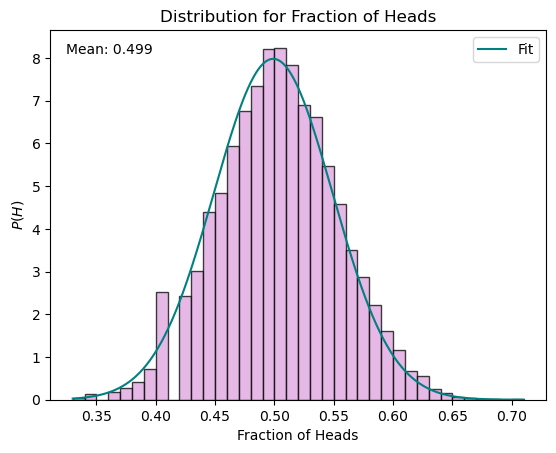

In [18]:
n = 100           # number of tosses per sample
N_samples = 10000 # total number of experiments

all_frac, strings = coin_toss(N_samples, n)

frac_heads = np.array([counts[0]/n for counts in all_frac])

mu = np.mean(frac_heads)
sigma = np.std(frac_heads)
x_vals = np.linspace(min(frac_heads), max(frac_heads), 500)
pdf_vals = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-((x_vals - mu) ** 2)/(2 * sigma** 2))

plt.hist(frac_heads, density = True, bins = 38, alpha = 0.75, color = 'plum', edgecolor = 'k')
plt.plot(x_vals, pdf_vals, color = 'teal', label = 'Fit')
plt.xlabel(r'Fraction of Heads')
plt.ylabel(r'$P(H)$')
plt.title('Distribution for Fraction of Heads')
plt.figtext(0.15, 0.83, f'Mean: {round(np.mean(frac_heads), 4)}')
plt.legend()
plt.show()

In [19]:
error = np.sqrt(np.std(frac_heads))/np.sqrt(N_samples)
print('Error:', error)

Error: 0.00223590120094232


## Monte Carlo Integration in Higher Dimensions

For $d$ dimensions, we have $I = \int_{V} d^{d} f(x) = \sum_{i = 1}^{1} \frac{V}{n} f(x_{i}) + O(\frac{1}{n^{1/d}})$, where $n$ is the number of boxes or compartments we are dividing the space into and $V$ is the total volume. We first fix $n$ and choose $n$ points at random. We can further write the function we want to integrate as $f(x) = f(x_i) + \vec{\nabla} f_{x_i} \cdot (x - x_i) + O((x - x_i)^{2})$. So, we have

$\int_{x_i}^{x_i + dx} = \int f(x_i)dx \text{ (our estimate using the Taylor series)} + \int \vec{\nabla} f_{x_i} \cdot (x - x_i) + \int \Pi^{d - 1}_{j = 1} dx_{j}$.

Here, $\Pi^{d - 1}_{j = 1} dx_{j}$ is the volume for a $d - 1$ dimensional box and $\vec{\nabla} f_{x_i} \cdot (x - x_i)$ is essentially $(\Delta x)^2$

$= \int_{x_i}^{x_i + dx} f(x) + (\Delta x)(\Delta x V_{d - 1}) = \int_{x_i}^{x_i + dx} + \Delta x V_{d}$

where $\Delta x V_{d}$ is our error of the order $\frac{1}{n^{1/d}}$. So, the integral is $V \left(\frac{1}{n} \sum_{i = 1}^{1} f(x_{i})\right) + O(\frac{1}{n^{1/d}})$, where $\left(\frac{1}{n} \sum_{i = 1}^{1} f(x_{i})\right)$ is the average of $n$ random numbers. Whenever $d > 2$, it is better to use the Monte Carlo way.

In [29]:
def f(x):
    return np.sum(x**2)

def MC_integration(bounds, n_samples):
    d = len(bounds)  # dimensions
    V = np.prod([b - a for (a, b) in bounds]) # total volume V of the integration domain

    points = np.random.rand(n_samples, d) # generating n_samples d-dimensional random points within the bounds
    for i in range(d):
        a, b = bounds[i]
        points[:, i] = a + points[:, i] * (b - a)  # scaling to [a,b]

    f_vals = np.array([f(pt) for pt in points])
    f_avg = np.mean(f_vals)

    I = V*f_avg

    error = V/n_samples**(1/d)

    return I, error

In [30]:
d = 5
bounds = [(0, 1)]*d  # we have a hypercube [0,1]^d

I, error = MC_integration(bounds, 100000)

print(f'Estimated integral: {I}')
print(f'Error ~ O(1/n^(1/d)): {error}')

Estimated integral: 1.6708642779043965
Error ~ O(1/n^(1/d)): 0.09999999999999998
